## Análise de Regressão Simples

### Problema 1

Para uma amostra de oito operadores de máquina, foram coletados o número de horas de treinamento (x) e o tempo necessário para completar o trabalho (y). Os dados coletados encontram-se na tabela abaixo:

x	5.2	5.1	4.9	4.6	4.7	4.8	4.6	4.9
y	13	15	16	20	19	17	21	16

Com estes dados, faça:

a)    Um gráfico de dispersão para os dados

In [1]:
# Carregando os dados
x <- c(5.2,5.1,4.9,4.6,4.7,4.8,4.6,4.9)
y <- c(13,15,16,20,19,17,21,16)
operadores <- data.frame(x, y)
names(operadores) <- c("treinameto","trabalho")

head(operadores)

,treinameto,trabalho
,<dbl>,<dbl>
1,5.2,13
2,5.1,15
3,4.9,16
4,4.6,20
5,4.7,19
6,4.8,17


In [2]:
# verificando a estrutura
str(operadores)

'data.frame':	8 obs. of  2 variables:
 $ treinameto: num  5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9
 $ trabalho  : num  13 15 16 20 19 17 21 16


In [3]:
summary(operadores)

   treinameto       trabalho    
 Min.   :4.600   Min.   :13.00  
 1st Qu.:4.675   1st Qu.:15.75  
 Median :4.850   Median :16.50  
 Mean   :4.850   Mean   :17.12  
 3rd Qu.:4.950   3rd Qu.:19.25  
 Max.   :5.200   Max.   :21.00  

In [4]:
# importando bibliotecas
library(ggplot2)
library(ggpubr)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



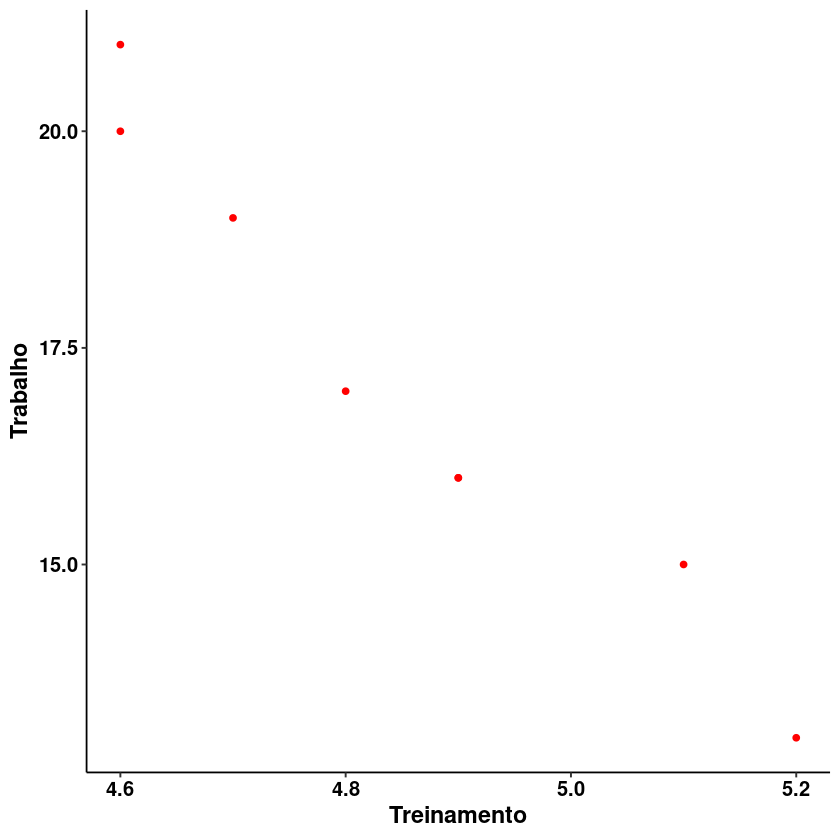

In [5]:
# montando o gráfico de dispersão
p <- ggplot(data = operadores, aes(x = treinameto, y = trabalho)) + geom_point(color = "red",
 fill = "blue") + xlab("Treinamento") + ylab("Trabalho") +
 theme_pubr(legend = "right") + labs_pubr() + theme(plot.caption = element_text(hjust = 0))
p

b) Determine o modelo de regressão linear simples entre as variáveis x e y, sendo y a variável resposta.

In [10]:
# Montando a regressão linear
regressao <- lm(y ~ x, data=operadores)
regressao


Call:
lm(formula = y ~ x, data = operadores)

Coefficients:
(Intercept)            x  
      74.90       -11.91  


c) Faça uma análise do modelo de regressão utilizando a função summary:
    i) resíduos, significância estatística dos coeficientes, percentual de variância explicada pelo modelo.

In [11]:
summary(regressao)


Call:
lm(formula = y ~ x, data = operadores)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


* Resíduos: distribuição simetrica, com mediana próxima de zero
* Significância estatística dos coeficientes: Próxima de 0
* Percentual de variância explicada pelo modelo: 0,9396

d) Trace, no gráfico anterior, a reta de regressão.

In [8]:
# determinando parâmetros da reta
SX <- sum(x)
SX

[1] 38.8

In [9]:
SSX <- sum((x - mean(x))^2)
SSX

[1] 0.34

In [10]:
SY <- sum(y)
SY

[1] 137

In [11]:
SSY <- sum((y - mean(y))^2)
SSY

[1] 50.875

In [12]:
SSXY <- sum((x - mean(x)) * (y - mean(y)))
SSXY

[1] -4.05

In [13]:
b_1 <- SSXY/SSX
b_1

[1] -11.91176

In [14]:
b_0 <- mean(y) - b_1 * mean(x)
b_0

[1] 74.89706

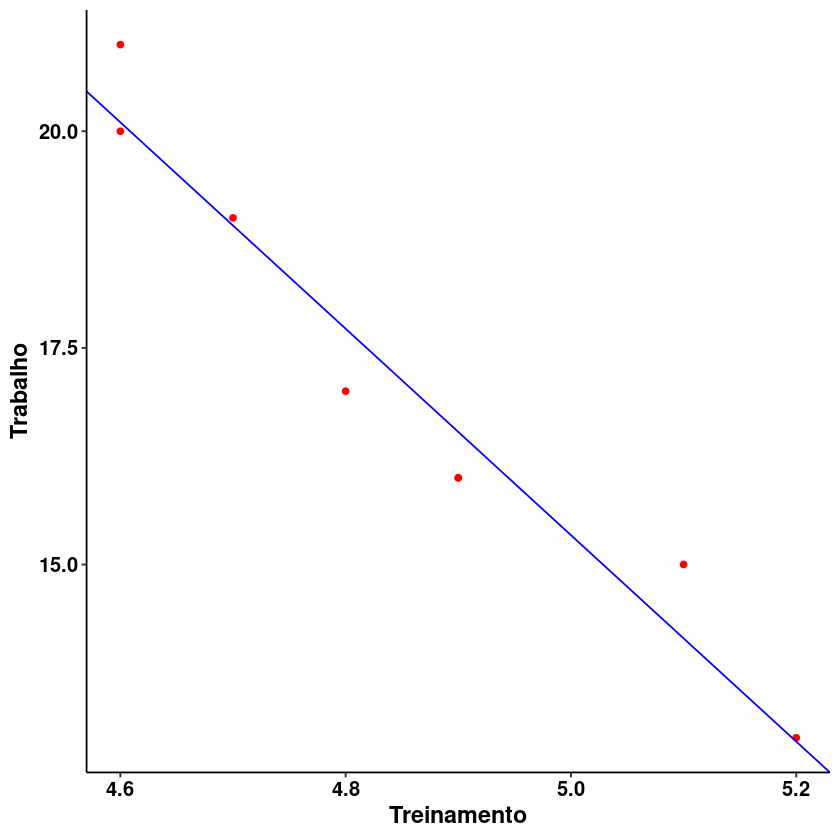

In [15]:
# adicionando a reta de regressão no gráfico
p <- ggplot(data = operadores, aes(x = treinameto, y = trabalho)) + geom_point(color = "red",
 fill = "blue") + xlab("Treinamento") + ylab("Trabalho") +
 theme_pubr(legend = "right") + labs_pubr() + theme(plot.caption = element_text(hjust = 0))
p <- p + geom_abline(intercept = b_0, slope = b_1, color = "blue")
p